In this notebook I have done a survey on "FOOD" handles of Instagram by web scraping using Selenium. Same code can be be applied for other content/topics
(Change the search handle in 1.1 for results on other desired topics)

To use some other functionalities of this Bot refer to InstaBot- Part-I notebook.

### Instructions

1. Enter your Username and Password in 'Log in Instagram' section.

2. Please run the codes in sequence as given, as some functions are dependent.

3. Incase you feel the site has stopped processing the code, please have some patience as some components take time to load and code has been accordingly written to handle it.


## Creating Web Driver Session 

In [154]:
#importing selenium libraries
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
import time
from bs4 import BeautifulSoup

In [140]:
driver=webdriver.Chrome(executable_path='/home/gk-gunjan/Desktop/chromedriver')

In [141]:
def logIn(user_name,Password):
    driver.get('https://www.instagram.com/?hl=en')
    time.sleep(5)
    assert 'Instagram' in driver.title
    us=driver.find_element_by_name("username")
    us.send_keys(user_name)
    ps=driver.find_element_by_name("password")
    ps.send_keys(Password)
    bt=driver.find_element_by_xpath("//button[contains(@class,'y3zKF')]")
    bt.submit()
    time.sleep(5)

In [142]:
def login_process():   
    try :
        #dont save information
        bt=driver.find_element_by_xpath("//button[contains(@class,'sqdOP yWX7d    y3zKF     ')]")
        bt.click()
    except NoSuchElementException:
        pass
     
        
    try:
        # dont turn on notification
        bt=driver.find_element_by_xpath("//button[contains(@class,'aOOlW   HoLwm ')]")
        bt.click() 
        driver.maximize_window()
    except NoSuchElementException:
        pass

In [143]:
#Enter your instagram username and password inplace of sample username and sample password
logIn("USERNAME","PASSWORD")

In [144]:
#for not saving info and turning off notifications
login_process()

## 1.1 Exracting top 5 handles with highest followers

### Handles with highest followers

In [155]:
#fetching names of the Instagram Handles that are displayed in list after typing “food” 
   
def search_and_open(profile):
    driver.get("https://www.instagram.com/"+profile)
    
   
 #finding number of followers  
def find_number_of_followers(profile):
    search_and_open(profile)
    wait = WebDriverWait(driver, 10)
    wait2= wait.until(EC.presence_of_element_located((By.CLASS_NAME,"-nal3"))) 
    data = driver.page_source
    html_data = BeautifulSoup(data, 'html.parser')
    n= html_data.find_all(class_ = '-nal3')
    
    num_f=n[1].span["title"]

    
    return num_f


In [157]:
search=driver.find_element_by_xpath('//input[contains(@class,"XTCLo")]')
search.clear()
search.send_keys("food")
time.sleep(3)

l=driver.find_elements_by_class_name("uL8Hv")
l=l[8:18]
insta_handles=[]
for i in l:
    insta_handles.append(i.get_attribute('innerHTML').strip('#'))
   
    
d={}
for i in insta_handles:
    num_followers=find_number_of_followers((i))
    
    num_followers=num_followers.replace(",","")
    d[i]=int(num_followers)

#finding top 5
sort_d={k: v for k,v in sorted(d.items(), key=lambda item:item[1],reverse=True)}
c=0
print("The top 5 which have the highest number of followers :-")
for i in sort_d:
    if(c==5):
        break
    
    print(c+1,i,"-->",sort_d[i])
    c+=1

The top 5 which have the highest number of followers :-
1 dilsefoodie --> 764179
2 foodie_incarnate --> 308020
3 foodtalkindia --> 304623
4 thisisdelhi --> 165167
5 food --> 116884


## 1.2

In [159]:
insta_handles

['foodtalkindia',
 'dilsefoodie',
 'pandareviewz',
 'mccainfoods_india',
 'thisisdelhi',
 'delhifoodguide',
 'food',
 'delhieater',
 'food_lunatic',
 'foodie_incarnate']

### Now Find the number of posts these handles have done in the previous 3 days.

In [167]:
top_five =[]
count=0
for i in sort_d:
    if count==5:
        break
    top_five.append(i)
    count+=1


In [168]:
top_five

['dilsefoodie', 'foodie_incarnate', 'foodtalkindia', 'thisisdelhi', 'food']

In [173]:
driver.get('https://www.instagram.com/')

In [171]:
#counting number of posts these handles have done in the previous 3 days    
def count_posts(profile):
    search_and_open(profile)
    wait = WebDriverWait(driver, 10)
    to_be_count=wait.until(EC.element_to_be_clickable((By.XPATH,'//div[contains(@class,"v1Nh3 kIKUG")]/a')))
    to_be_count.click()
    count=0

    while(True):
        wait = WebDriverWait(driver, 10)
        find= wait.until(EC.presence_of_element_located((By.CLASS_NAME,'c-Yi7'))) 
    
        data = driver.page_source
        html_data = BeautifulSoup(data, 'html.parser')
        date=html_data.find(class_='c-Yi7')
        date=date.time.string
        arr_date=date.split()
    
        #previous 3 day check
        if(arr_date[1]=="day" or arr_date[1]=="days"):
            if(int(arr_date[0])<=3):
                count+=1
            else:
                break
            
        elif(arr_date[1]=="month" or arr_date[1]=="months" or arr_date[1]=="year" or arr_date[1]=="years" ):
            break
        else:
            count+=1
        
        next=driver.find_element_by_class_name('coreSpriteRightPaginationArrow')
        next.click()
    
    driver.get("https://www.instagram.com/")
    time.sleep(2)
    return count

In [244]:
posts={}
for i in top_five:
    posts[i]=count_posts(i)
    
print("The number of posts these handles have done in the previous 3 days:-")

for i in posts:
    print(i,"-->",posts[i])

The number of posts these handles have done in the previous 3 days:-
dilsefoodie --> 3
foodie_incarnate --> 4
foodtalkindia --> 3
thisisdelhi --> 5
food --> 4


## 1.3

### Depict this information using a suitable graph.

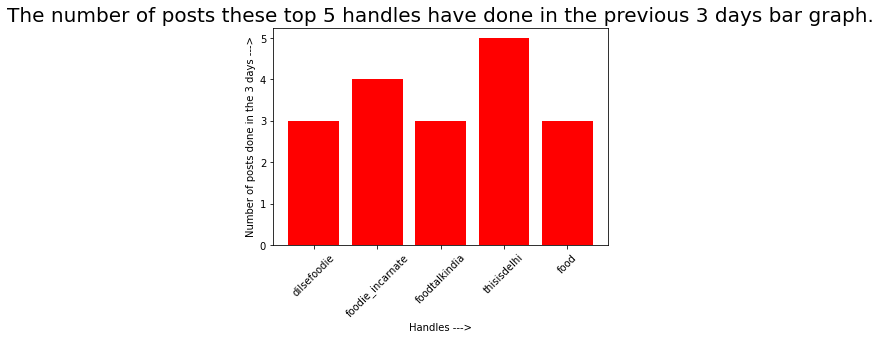

In [183]:
import matplotlib.pyplot as plt
x=[]
y=[]
for i in posts:
    x.append(i)
    y.append(posts[i])
plt.bar(x,y,color='r')
plt.title('The number of posts these top 5 handles have done in the previous 3 days bar graph.',fontdict={'fontsize':20})
plt.xlabel('Handles --->')
plt.ylabel('Number of posts done in the 3 days --->')
plt.xticks(rotation=45,color='black')
plt.show()

## 2.1 Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [184]:
#scraping content of the 5 food handles obtained before
def scrape_content(profile):
    search_and_open(profile)
    wait = WebDriverWait(driver, 10)
    to_be_scraped=wait.until(EC.element_to_be_clickable((By.XPATH,'//div[contains(@class,"v1Nh3 kIKUG")]/a')))
    to_be_scraped.click()

    content_list=[]
    for i in range(10):
        content = wait.until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class, "C4VMK")]')))

        data = driver.page_source
        html_data = BeautifulSoup(data, 'html.parser')

        content_data = html_data.find(class_ = 'C4VMK')
        c = content_data.contents[1]
        
        #adding the content of each post
        content_list.append(list(c.stripped_strings))
        
        
        next=driver.find_element_by_class_name('coreSpriteRightPaginationArrow')
        next.click()
        
    driver.get("https://www.instagram.com/")
    time.sleep(2)
    return content_list

In [186]:
contents={}
for i in top_five:
    contents[i]=scrape_content(i)
    
for i in contents:
    print("Contents of",i,"->")
    q=1
    for j in contents[i]:
        print(q,end=" ")
        q+=1
        for k in j:
            print(k)

Contents of dilsefoodie ->
1 Much Needed Break For Hyderabadi Irani Chai And Osmania Biscuits At Nimrah Cafe & Bakery 😀.
#dilsefoodie
#ramadan
2 After having this mera dil bhi kho gaya 😂
Anyone here Icecream Craving ?
@huberandholly
, Jublee Hills, Hyderabad
#dilsefoodie
3 800kg Gur Making ☺️
Video Coming Soon On Facebook And Instagram.
#dilsefoodie
4 Ram Babu Ke Parathe (Agra Wale) Now In Manesar
Quality Of Food And Taste Super Duper Good ☺️.
Ab Paranthe Khane Ho To Murthal Ki Jagha Manesar Bhi Jaa Sakte Ho
#dilsefoodie
5 😍😍😍😍😍😍😍😍😍
6 Have you been to this place in Mysore ?
One of the best place to have set masala dosa and idli.
#dilsefoodie
7 @chatpati_shikha
's Special Chole Bhature
Bhai Maza Aagaya Zindagi Mai Pehli Baar Ladki Ne Bhature Fula Diya 😂.
#dilsefoodie
8 Champaran Meat By
@chefrajeevgoyal
❤️
Mazedaaaar Taste Tha 👏👏👏👏👏
#dilsefoodie
#reelkarofeelkaro
9 Fully Automatic Kitchen At Gurudwara Bangla Sahib
Making Langar For 30k -40k Per Day And On Weekends 80k.
In the beginning 

## 2.2 Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [190]:
words=dict()
for i in contents:
    for j in contents[i]:
        for k in j:
            k=k.strip()
            k=k.lower()
            words[k]=words.get(k,0)+1

#sorting    
sort_words={k: v for k,v in sorted(words.items(), key=lambda item:item[1],reverse=True)}

print("Words used in all the scraped posts & the frequency of each word :-->")

c=1
for i in sort_words:
    print(c,i,"->",sort_words[i])
    c+=1


Words used in all the scraped posts & the frequency of each word :-->
1 . -> 36
2 @thisisdelhi -> 22
3 follow -> 21
4 #streetfood -> 16
5 #indianfood -> 14
6 #delhifoodblogger -> 14
7 #mumbai -> 13
8 #foodforlife -> 13
9 #yum -> 11
10 #foodieincarnate -> 10
11 #dilsefoodie -> 9
12 #delhifoodie -> 9
13 #delhi -> 9
14 #breakfast -> 9
15 #delhifood -> 8
16 #thisisdelhi -> 8
17 #likeforlike -> 8
18 #snacks -> 8
19 #spicy -> 8
20 #satisfying -> 8
21 #satisfyingvideos -> 8
22 #mumbaifoodblogger -> 8
23 #grub -> 8
24 #f52grams -> 8
25 #delhincr -> 8
26 #india -> 8
27 #indian -> 8
28 #nycfood -> 8
29 #food -> 8
30 #foodblogger -> 7
31 #indianfoodbloggers -> 7
32 #tasty -> 7
33 #video -> 7
34 #foodphotography -> 7
35 #homemade -> 7
36 #dessert -> 7
37 #sodelhi -> 6
38 #newdelhi -> 6
39 #foodtalkindia -> 6
40 #delhigram -> 6
41 #foodie -> 6
42 #delhistreetfood -> 6
43 #indianfoodie -> 6
44 #indianfoodblogger -> 6
45 #yummyintummy -> 6
46 #nycfoodie -> 6
47 #reels -> 5
48 kindly watch the full vi

## 2.3  Create a csv file with two columns : the word and its frequency

In [197]:
import pandas as pd

dict_words={"Word":list(sort_words.keys()),"Frequency":list(sort_words.values())}
#creating dataframe      
df=pd.DataFrame(dict_words)

#putting into csv file
df.to_csv('Words_with_Frequency.csv',index=False)

## 2.4 Now, find the hashtags that were most popular among these bloggers

In [207]:
hashtag={}

#extracting words having hashtags
    
for i in contents:
   
    for j in contents[i]:
            for k in j:
                k=k.strip()
                k=k.lower()
                
                if("#" in k):
                    hashtag[k]=hashtag.get(k,0)+1

#sorting in desc order   
sort_hashtag={k: v for k,v in sorted(hashtag.items(), key=lambda item:item[1],reverse=True)}

print("The top 10 hashtags that were most popular among these bloggers and number of times used :-->")

c=0
for i in sort_hashtag:
    if(c==10):
        break
    print(c+1,i,"->",sort_hashtag[i])
    c+=1

The top 10 hashtags that were most popular among these bloggers and number of times used :-->
1 #streetfood -> 16
2 #indianfood -> 14
3 #delhifoodblogger -> 14
4 #mumbai -> 13
5 #foodforlife -> 13
6 #yum -> 11
7 #foodieincarnate -> 10
8 #dilsefoodie -> 9
9 #delhifoodie -> 9
10 #delhi -> 9


## 2.5 Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

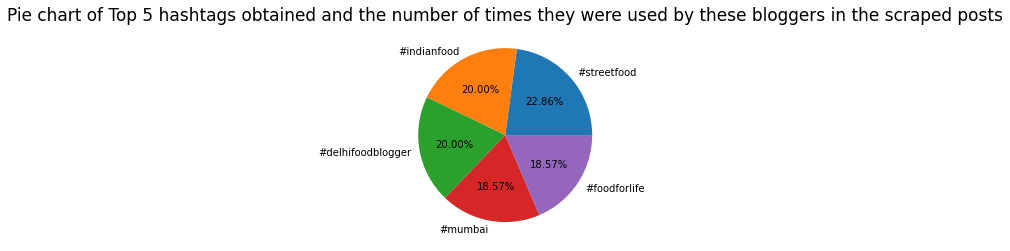

In [212]:
count=0
x=[]
y=[]
for i in sort_hashtag:
    if(count==5):
        break
    x.append(i)
    y.append(sort_hashtag[i])
    count+=1
    
#plotting pie chart.
plt.pie(y,labels=x, autopct = '%.2f%%')
plt.title('Pie chart of Top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts',fontsize=17)
plt.show()

## 3.1 Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [248]:
from selenium.common.exceptions import TimeoutException
#getting number of likes
def get_no_likes(profile):
    search_and_open(profile)
    wait = WebDriverWait(driver, 5)
    first=wait.until(EC.element_to_be_clickable((By.XPATH,'//div[contains(@class,"v1Nh3 kIKUG")]/a')))
    first.click()
    
    number_like=[]
    
    for i in range(10):
        #using try except to differentiate for videos and photos
        try:
            wait = WebDriverWait(driver, 3)
            view_button=wait.until(EC.presence_of_element_located((By.CLASS_NAME,"vcOH2")))
            view_button.click()
            
            like=wait.until(EC.presence_of_element_located((By.CLASS_NAME,"vJRqr")))
            data = driver.page_source
            html_data = BeautifulSoup(data, 'html.parser')
            no_likes=html_data.find(class_="vJRqr").span.string
            no_likes=no_likes.replace(",","")
            no_likes=int(no_likes)
            number_like.append(no_likes)
            
            goto=driver.find_element_by_class_name("QhbhU")
            goto.click()
            next=driver.find_element_by_class_name('coreSpriteRightPaginationArrow')
            next.click()
            
        except TimeoutException:
           
            wait = WebDriverWait(driver, 3)
            like2=wait.until(EC.presence_of_element_located((By.CLASS_NAME,"Nm9Fw")))
            data2= driver.page_source
            html_data2 = BeautifulSoup(data2, 'html.parser')
            no_likes2=html_data2.find(class_="Nm9Fw").a.span.string
            no_likes2=no_likes2.replace(",","")
            no_likes2=int(no_likes2)
            number_like.append(no_likes2)
            next=driver.find_element_by_class_name('coreSpriteRightPaginationArrow')
            next.click()
            
        
    driver.get("https://www.instagram.com/")
    time.sleep(2)
        
    return number_like 

In [249]:
number_likes={}
for i in top_five:
    number_likes[i]=get_no_likes(i)

print("The likes of the top 10 posts of the 5 handles obtained earlier :-")
for i in number_likes:
    print(i,"--->",number_likes[i])

The likes of the top 10 posts of the 5 handles obtained earlier :-
dilsefoodie --> [3471, 3946, 5780, 13997, 13186, 7447, 24471, 6721, 32487, 4874]
foodie_incarnate --> [8246, 19339, 17219, 33652, 14869, 10363, 16882, 83904, 2031, 13603]
foodtalkindia --> [884, 424, 313, 518, 539, 359, 241, 187, 1294, 1631]
thisisdelhi --> [1150, 1033, 854, 1772, 3492, 2218, 2558, 7597, 1992, 3515]
food --> [120, 696, 973, 916, 455, 899, 644, 1081, 1128, 984]


### 3.2  Calculate the average likes for a handle.

In [250]:
#finding average likes per handle
avg_likes={}
for i in number_likes:
    like=sum(number_likes[i])
    avg_likes[i]=like/10
    
print("The average likes for respective handles :-")

c=1
for i in avg_likes:
    print(c,i,"-->",avg_likes[i])
    c+=1

The average likes for respective handles :-
1 dilsefoodie --> 11638.0
2 foodie_incarnate --> 22010.8
3 foodtalkindia --> 639.0
4 thisisdelhi --> 2618.1
5 food --> 789.6


### 3.3 Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [252]:
#finding average likes:followers per handle
ratio={}
for i in top_five:
    ratio[i]=avg_likes[i]/sort_d[i]
    
print("The average followers:like ratio of each handle :-")

c=1
for i in ratio:
    print(c,i,"-->","%.6f"%ratio[i])
    c+=1

The average followers:like ratio of each handle :-
1 dilsefoodie --> 0.015229
2 foodie_incarnate --> 0.071459
3 foodtalkindia --> 0.002098
4 thisisdelhi --> 0.015851
5 food --> 0.006755


## 3.4  Create a bar graph to depict the above obtained information.

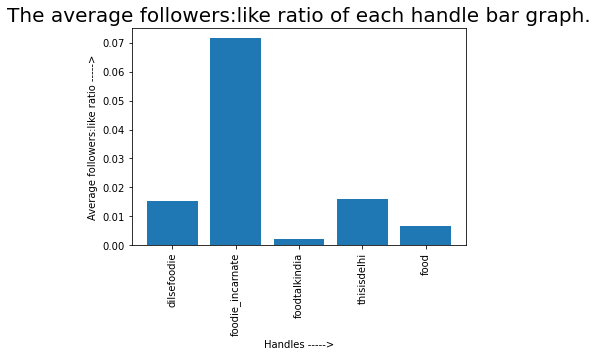

In [253]:
import matplotlib.pyplot as plt
x,y=[],[]

for i in ratio:
    x.append(i)
    y.append(ratio[i])
    
#plotting bar graph.
plt.bar(x,y)
plt.title('The average followers:like ratio of each handle bar graph.',fontdict={'fontsize':20})
plt.xlabel('Handles ----->')
plt.ylabel('Average followers:like ratio ----->')
plt.xticks(rotation=90)
plt.show()